In [1]:
import pickle
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [2]:
def pickle_read(filename):
    with open(filename, "rb") as f:
        data = pickle.load(f)
    return data

data_reshaped = pickle_read('../PoseCorrection/Data/010920/data_reshaped.pickle')

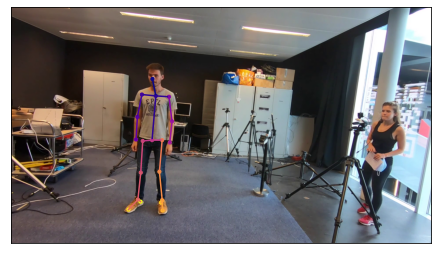

In [5]:
def convert_points(pts):
    pts_bis = []
    for p in pts:
        if p == 19:
            pts_bis.append(15)
        elif p == 21:
            pts_bis.append(16)
        elif p == 22:
            pts_bis.append(17)
        elif p == 24:
            pts_bis.append(18)
        else: 
            pts_bis.append(p)
    return pts_bis

joints = {0: 'Nose', 1: 'Neck', 2: 'RShoulder', 3: 'RElbow', 4: 'RWrist', 5: 'LShoulder', 6: 'LElbow',7: 'LWrist', 
          8: 'MidHip', 9: 'RHip', 10: 'RKnee', 11: 'RAnkle', 12: 'LHip', 13: 'LKnee', 14: 'LAnkle', 15: 'REye', 
          16: 'LEye', 17: 'REar', 18: 'LEar', 19: 'LBigToe', 20: 'LSmallToe', 21: 'LHeel', 22: 'RBigToe', 
          23: 'RSmallToe', 24: 'RHeel'}

links = {0: [0, 1], 1: [1, 2, 5, 8], 2: [2, 3], 3:[3, 4], 4: [4], 5: [5, 6], 6: [6, 7], 7: [7], 
         8: [8, 9, 12], 9: [9, 10], 10: [10, 11], 11: [11, 22, 24], 12: [12, 13], 13: [13, 14], 
         14: [14, 19, 21], 19: [19], 21: [21], 22: [22], 24: [24]}

img_width = 1920
img_height = 1080

frames = [('SQUAT', 'Hugues', 1, 'frame_000125')]
cameras = ['6_4']

plt.figure(figsize=(20,20))
for l, f in enumerate(frames):
    for k, cam in enumerate(cameras):
        image = plt.imread(f'/Users/huguesvinzant/Documents/PHOM/PdM/Data/010920/{cam}/frames/{f[3]}.png')
        gt2d = data_reshaped[f[0]][f[1]][f[2]][f[3]]['2D_gt'][cam]
        
        x2d = [i[0] for k, i in gt2d['p'].items() if k in links.keys()]
        y2d = [i[1] for k, i in gt2d['p'].items() if k in links.keys()]
        c2d = [i for k, i in gt2d['c'].items() if k in links.keys()]
        
        plt.subplot(4, 1, k + 1)
        colors = plt.cm.plasma(np.linspace(0, 1, len(x2d)))
        plt.imshow(image)
        plt.scatter(x=x2d, y=y2d, c=colors, s=10)
        
        for p1, v in links.items():
            for p2 in v:
                if p1 != p2:
                    p = convert_points([p1, p2])
                    if c2d[p[0]] == 1 and c2d[p[1]] == 1:
                        xs = [x2d[p[0]], x2d[p[1]]]
                        ys = [y2d[p[0]], y2d[p[1]]]
                        plt.plot(xs, ys, c=colors[p[0]])
                    
        plt.xticks([])
        plt.yticks([])
        
plt.show()

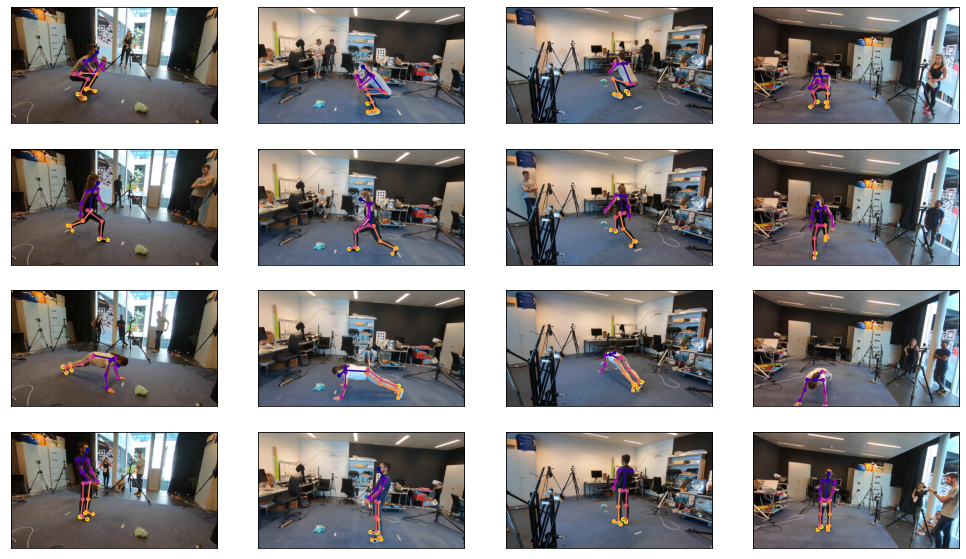

In [4]:
def convert_points(pts):
    pts_bis = []
    for p in pts:
        if p == 19:
            pts_bis.append(15)
        elif p == 21:
            pts_bis.append(16)
        elif p == 22:
            pts_bis.append(17)
        elif p == 24:
            pts_bis.append(18)
        else: 
            pts_bis.append(p)
    return pts_bis

joints = {0: 'Nose', 1: 'Neck', 2: 'RShoulder', 3: 'RElbow', 4: 'RWrist', 5: 'LShoulder', 6: 'LElbow',7: 'LWrist', 
          8: 'MidHip', 9: 'RHip', 10: 'RKnee', 11: 'RAnkle', 12: 'LHip', 13: 'LKnee', 14: 'LAnkle', 15: 'REye', 
          16: 'LEye', 17: 'REar', 18: 'LEar', 19: 'LBigToe', 20: 'LSmallToe', 21: 'LHeel', 22: 'RBigToe', 
          23: 'RSmallToe', 24: 'RHeel'}

links = {0: [0, 1], 1: [1, 2, 5, 8], 2: [2, 3], 3:[3, 4], 4: [4], 5: [5, 6], 6: [6, 7], 7: [7], 
         8: [8, 9, 12], 9: [9, 10], 10: [10, 11], 11: [11, 22, 24], 12: [12, 13], 13: [13, 14], 
         14: [14, 19, 21], 19: [19], 21: [21], 22: [22], 24: [24]}

img_width = 1920
img_height = 1080

frames = [('SQUAT', 'Hugues', 1, 'frame_000150'), ('Lunges', 'Isinsu', 1, 'frame_032150'), 
          ('Plank', 'Sena', 1, 'frame_041860'), ('Pick-up', 'Vidit', 8, 'frame_070000')]
cameras = ['6_1', '6_2', '6_3', '6_4']

plt.figure(figsize=(17,10))
for l, f in enumerate(frames):
    for k, cam in enumerate(cameras):
        image = plt.imread(f'/Users/huguesvinzant/Documents/PHOM/PdM/Thesis/images/{cam}/{f[3]}.png')
        gt2d = data_reshaped[f[0]][f[1]][f[2]][f[3]]['2D_op'][cam]
        
        x2d = [i[0] for k, i in gt2d['p'].items() if k in links.keys()]
        y2d = [i[1] for k, i in gt2d['p'].items() if k in links.keys()]
        c2d = [i for k, i in gt2d['c'].items() if k in links.keys()]
        
        plt.subplot(4, 4, k + 1 + 4*l)
        colors = plt.cm.plasma(np.linspace(0, 1, len(x2d)))
        plt.imshow(image)
        plt.scatter(x=x2d, y=y2d, c=colors, s=10)
        
        for p1, v in links.items():
            for p2 in v:
                if p1 != p2:
                    p = convert_points([p1, p2])
                    if c2d[p[0]] == 1 and c2d[p[1]] == 1:
                        xs = [x2d[p[0]], x2d[p[1]]]
                        ys = [y2d[p[0]], y2d[p[1]]]
                        plt.plot(xs, ys, c=colors[p[0]])
                    
        plt.xticks([])
        plt.yticks([])
        
plt.show()

In [5]:
def convert_points(pts):
    pts_bis = []
    for p in pts:
        if p == 19:
            pts_bis.append(15)
        elif p == 21:
            pts_bis.append(16)
        elif p == 22:
            pts_bis.append(17)
        elif p == 24:
            pts_bis.append(18)
        else: 
            pts_bis.append(p)
    return pts_bis

joints = {0: 'Nose', 1: 'Neck', 2: 'RShoulder', 3: 'RElbow', 4: 'RWrist', 5: 'LShoulder', 6: 'LElbow',7: 'LWrist', 
          8: 'MidHip', 9: 'RHip', 10: 'RKnee', 11: 'RAnkle', 12: 'LHip', 13: 'LKnee', 14: 'LAnkle', 15: 'REye', 
          16: 'LEye', 17: 'REar', 18: 'LEar', 19: 'LBigToe', 20: 'LSmallToe', 21: 'LHeel', 22: 'RBigToe', 
          23: 'RSmallToe', 24: 'RHeel'}

links = {0: [0, 1], 1: [1, 2, 5, 8], 2: [2, 3], 3:[3, 4], 4: [4], 5: [5, 6], 6: [6, 7], 7: [7], 
         8: [8, 9, 12], 9: [9, 10], 10: [10, 11], 11: [11, 22, 24], 12: [12, 13], 13: [13, 14], 
         14: [14, 19, 21], 19: [19], 21: [21], 22: [22], 24: [24]}

img_width = 1920
img_height = 1080

frames = [('SQUAT', 'Hugues', 1, 'frame_000150'), ('Lunges', 'Isinsu', 1, 'frame_032150'), 
          ('Plank', 'Sena', 1, 'frame_041860'), ('Pick-up', 'Vidit', 8, 'frame_070000')]

fig = make_subplots(rows=2, cols=4,
    specs=[[{'type': 'Scatter3d'}, {'type': 'Scatter3d'}, {'type': 'Scatter3d'}, {'type': 'Scatter3d'}], 
           [{'type': 'Scatter3d'}, {'type': 'Scatter3d'}, {'type': 'Scatter3d'}, {'type': 'Scatter3d'}]])
for l, f in enumerate(frames):
    gt3d = data_reshaped[f[0]][f[1]][f[2]][f[3]]['3D_gt']['world']

    x3d = [i[0] for k, i in gt3d.items() if k in links.keys()]
    y3d = [i[1] for k, i in gt3d.items() if k in links.keys()]
    z3d = [i[2] for k, i in gt3d.items() if k in links.keys()]

    x3d_tmp = []
    y3d_tmp = []
    z3d_tmp = []
    lines_colors = []
    for p1, v in links.items():
        for p2 in v:
            if p1 != p2:
                p = convert_points([p1, p2])
                if c2d[p[0]] == 1 and c2d[p[1]] == 1:
                    xs = [x2d[p[0]], x2d[p[1]]]
                    ys = [y2d[p[0]], y2d[p[1]]]
                    for i in range(2):
                        x3d_tmp.append(x3d[p[i]])
                        y3d_tmp.append(y3d[p[i]])
                        z3d_tmp.append(z3d[p[i]])
                        lines_colors.append(p[i])
                    x3d_tmp.append(None)
                    y3d_tmp.append(None)
                    z3d_tmp.append(None)
                    lines_colors.append(15)

    fig.add_trace(go.Scatter3d(x=x3d, y=y3d, z=z3d, mode='markers', name='Joints', 
                               hoverinfo='text', hovertext=list(joints.values()), 
                               marker=dict(color=list(links.keys()), size=8)), row=1, col=l+1)

    fig.add_trace(go.Scatter3d(x=x3d_tmp, y=y3d_tmp, z=z3d_tmp, mode='lines', 
                               name='Links', hoverinfo='text', 
                               line=dict(color=lines_colors, width=10)), row=1, col=l+1)
    
    fig.add_trace(go.Scatter3d(x=x3d, y=y3d, z=z3d, mode='markers', name='Joints', 
                               hoverinfo='text', hovertext=list(joints.values()), 
                               marker=dict(color=list(links.keys()), size=8)), row=2, col=l+1)

    fig.add_trace(go.Scatter3d(x=x3d_tmp, y=y3d_tmp, z=z3d_tmp, mode='lines', 
                               name='Links', hoverinfo='text', 
                               line=dict(color=lines_colors, width=10)), row=2, col=l+1)
    
scene = dict(xaxis = dict(range=[-0.3,0.3], 
                                    backgroundcolor="rgb(200, 200, 230)",
                                    showgrid=False,
                                    zeroline=False,
                                    showticklabels=False,
                                    showbackground=True,
                                    visible=False), 
                       yaxis = dict(range=[-0.3,0.3],
                                    backgroundcolor="rgb(230, 200, 230)",
                                    showgrid=False,
                                    zeroline=False,
                                    showticklabels=False,
                                    showbackground=True,
                                    visible=False), 
                       zaxis = dict(range=[-0.3,0.3],
                                    backgroundcolor="rgb(230, 230, 200)",
                                    showgrid=False,
                                    zeroline=False,
                                    showticklabels=False,
                                    showbackground=True,
                                    visible=False),
                       aspectmode='cube', 
                       xaxis_title='',
                       yaxis_title='',
                       zaxis_title='')

fig.update_layout(scene=scene, scene2=scene, scene3=scene, scene4=scene, 
                  scene5=scene, scene6=scene, scene7=scene, scene8=scene, showlegend=False)

fig.show()
fig.write_html("/Users/huguesvinzant/Desktop/file.html")

In [8]:
def convert_points(pts):
    pts_bis = []
    for p in pts:
        if p == 19:
            pts_bis.append(15)
        elif p == 21:
            pts_bis.append(16)
        elif p == 22:
            pts_bis.append(17)
        elif p == 24:
            pts_bis.append(18)
        else: 
            pts_bis.append(p)
    return pts_bis

joints = {0: 'Nose', 1: 'Neck', 2: 'RShoulder', 3: 'RElbow', 4: 'RWrist', 5: 'LShoulder', 6: 'LElbow',7: 'LWrist', 
          8: 'MidHip', 9: 'RHip', 10: 'RKnee', 11: 'RAnkle', 12: 'LHip', 13: 'LKnee', 14: 'LAnkle', 15: 'REye', 
          16: 'LEye', 17: 'REar', 18: 'LEar', 19: 'LBigToe', 20: 'LSmallToe', 21: 'LHeel', 22: 'RBigToe', 
          23: 'RSmallToe', 24: 'RHeel'}

links = {0: [0, 1], 1: [1, 2, 5, 8], 2: [2, 3], 3:[3, 4], 4: [4], 5: [5, 6], 6: [6, 7], 7: [7], 
         8: [8, 9, 12], 9: [9, 10], 10: [10, 11], 11: [11, 22, 24], 12: [12, 13], 13: [13, 14], 
         14: [14, 19, 21], 19: [19], 21: [21], 22: [22], 24: [24]}

img_width = 1920
img_height = 1080

frames = [('SQUAT', 'Hugues', 1, 'frame_000150')]

fig = go.Figure()
for l, f in enumerate(frames):
    gt3d = data_reshaped[f[0]][f[1]][f[2]][f[3]]['3D_gt']['world']

    x3d = [i[0] for k, i in gt3d.items() if k in links.keys()]
    y3d = [i[1] for k, i in gt3d.items() if k in links.keys()]
    z3d = [i[2] for k, i in gt3d.items() if k in links.keys()]

    x3d_tmp = []
    y3d_tmp = []
    z3d_tmp = []
    lines_colors = []
    for p1, v in links.items():
        for p2 in v:
            if p1 != p2:
                p = convert_points([p1, p2])
                if c2d[p[0]] == 1 and c2d[p[1]] == 1:
                    xs = [x2d[p[0]], x2d[p[1]]]
                    ys = [y2d[p[0]], y2d[p[1]]]
                    for i in range(2):
                        x3d_tmp.append(x3d[p[i]])
                        y3d_tmp.append(y3d[p[i]])
                        z3d_tmp.append(z3d[p[i]])
                        lines_colors.append(p[i])
                    x3d_tmp.append(None)
                    y3d_tmp.append(None)
                    z3d_tmp.append(None)
                    lines_colors.append(15)

    fig.add_trace(go.Scatter3d(x=x3d, y=y3d, z=z3d, mode='markers', name='Joints', 
                               hoverinfo='text', hovertext=list(joints.values()), 
                               marker=dict(color=list(links.keys()), size=8)))

    fig.add_trace(go.Scatter3d(x=x3d_tmp, y=y3d_tmp, z=z3d_tmp, mode='lines', 
                               name='Links', hoverinfo='text', 
                               line=dict(color=lines_colors, width=10)))
    
scene = dict(xaxis = dict(range=[-0.3,0.3], 
                                    backgroundcolor="rgb(200, 200, 230)",
                                    showgrid=False,
                                    zeroline=False,
                                    showticklabels=False,
                                    showbackground=True,
                                    visible=False), 
                       yaxis = dict(range=[-0.3,0.3],
                                    backgroundcolor="rgb(230, 200, 230)",
                                    showgrid=False,
                                    zeroline=False,
                                    showticklabels=False,
                                    showbackground=True,
                                    visible=False), 
                       zaxis = dict(range=[-0.3,0.3],
                                    backgroundcolor="rgb(230, 230, 200)",
                                    showgrid=False,
                                    zeroline=False,
                                    showticklabels=False,
                                    showbackground=True,
                                    visible=False),
                       aspectmode='cube', 
                       xaxis_title='',
                       yaxis_title='',
                       zaxis_title='')

fig.update_layout(scene=scene, showlegend=False)

fig.show()
fig.write_html("/Users/huguesvinzant/Desktop/file.html")